# Executive Summary
**Submitted by:** Edouard Ratiarson
**Deadline:** December 9, 2023

**Objective:** This submission demonstrates my hands-on experience in machine learning, focusing on a classification task. The primary goal is to predict the likelihood of a song being a hit on the Billboard charts, leveraging a dataset from [Kaggle: Popularity of Music Records](https://www.kaggle.com/datasets/econdata/popularity-of-music-records).

## Approach and Structure:
1. **Neural Network Implementation**: Initially, I designed and implemented a neural network for the classification task using TensorFlow. This early focus on a complex model provided a benchmark for subsequent comparisons.
2. **Data Preprocessing**: Following the neural network implementation, I cleaned and preprocessed the dataset. This involved handling missing values, outliers, and standardizing features for optimal model performance.
3. **Traditional Machine Learning Algorithms**: Post neural network analysis, I selected and implemented four traditional machine learning algorithms: Logistic Regression, Decision Trees, RandomForest, and K-NearestNeighbors. Each model was trained on the dataset and evaluated.
4. **Performance Comparison and Analysis**: The final step involved a comprehensive comparison of the neural network with traditional algorithms, using metrics like accuracy, precision, recall, and F1-score to gauge performance.

## Summary of Performance:
- The **neural network** exhibited high precision but lower recall, indicating a tendency towards false negatives.
- Among the traditional models, **Random Forest** demonstrated superior balance across all metrics, suggesting robustness and better generalization.
- **Logistic Regression** and **SVM** showed comparable accuracy and F1-scores, performing well in general classification tasks.
- **Decision Tree** displayed lower performance metrics, potentially due to overfitting issues.
- **K-Nearest Neighbors** provided competitive results, particularly in recall, highlighting its effectiveness in identifying true positives.

This comprehensive approach, starting with a neural network and followed by traditional machine learning models, allowed for an in-depth understanding of different algorithms' strengths and limitations in the context of song popularity prediction.

# Clear the DataFrame and Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ML2_Assignment_1

In [ ]:
# Completely removing the DataFrame structure
df = pd.DataFrame()


In [ ]:
# Clearing the DataFrame
df = df.iloc[0:0]

# This will remove all data from df, leaving an empty DataFrame with the same columns


In [ ]:
df = pd.read_csv(r"/content/songs wo timbre.csv", encoding='ISO-8859-1')

# Load the Dataset and analyze the data

In [ ]:
df.head()

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,11,0.453,0.966656,0.024,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,10,0.469,0.984710,0.025,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,2,0.209,0.989900,0.026,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,1,0.632,0.939207,0.013,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,6,0.483,0.987738,0.063,0


In [ ]:
df.shape

(7574, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      7574 non-null   int64  
 1   songtitle                 7574 non-null   object 
 2   artistname                7574 non-null   object 
 3   songID                    7574 non-null   object 
 4   artistID                  7574 non-null   object 
 5   timesignature             7574 non-null   int64  
 6   timesignature_confidence  7574 non-null   float64
 7   loudness                  7574 non-null   float64
 8   tempo                     7574 non-null   float64
 9   tempo_confidence          7574 non-null   float64
 10  key                       7574 non-null   int64  
 11  key_confidence            7574 non-null   float64
 12  energy                    7574 non-null   float64
 13  pitch                     7574 non-null   float64
 14  Top10   

In [ ]:
df['Top10'].unique()

array([0, 1])

<Axes: >

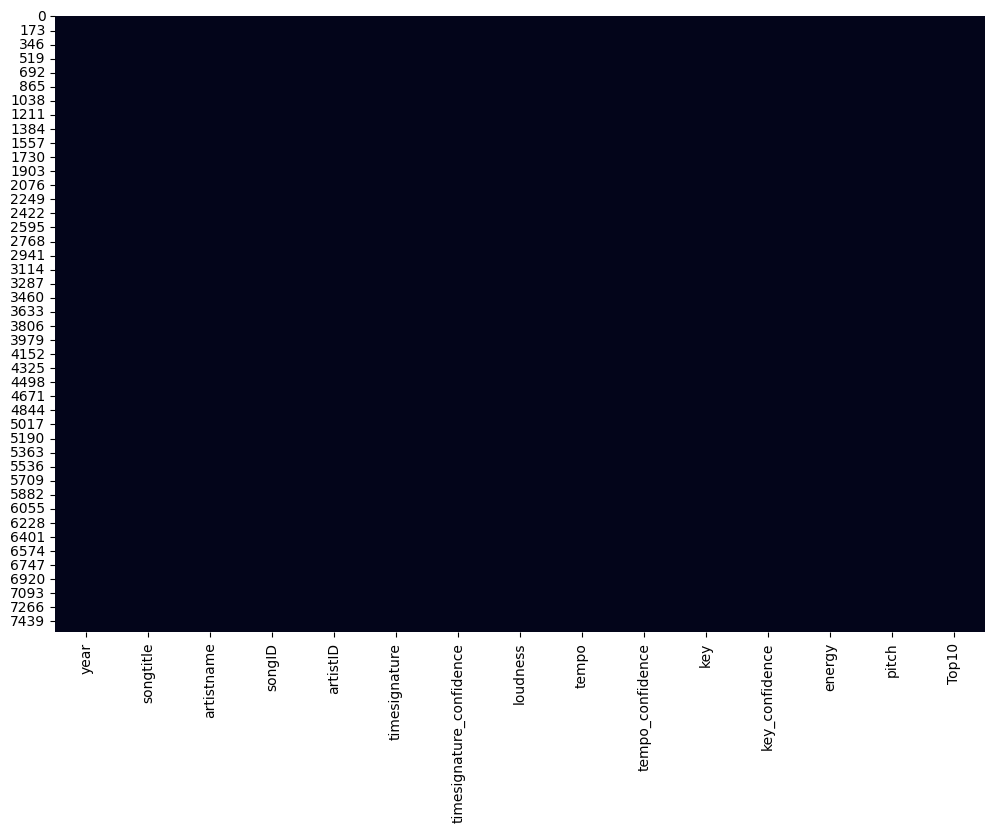

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
x = df.iloc[:, :-1]
y = pd.DataFrame(df['Top10'])

In [ ]:
x.head()

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,11,0.453,0.966656,0.024
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,10,0.469,0.984710,0.025
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,2,0.209,0.989900,0.026
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,1,0.632,0.939207,0.013
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,6,0.483,0.987738,0.063


In [ ]:
x = x.drop(['songID', 'artistID',
            'artistname', 'timesignature_confidence', 'tempo_confidence', 'key_confidence', 'pitch', 'year' ], axis=1, inplace=False)


In [ ]:
x.head

<bound method NDFrame.head of                                songtitle  timesignature  loudness    tempo  \
0     This Is the House That Doubt Built              3    -4.262   91.525   
1                        Sticks & Bricks              4    -4.051  140.048   
2                             All I Want              4    -3.571  160.512   
3                       It's Complicated              4    -3.815   97.525   
4                              2nd Sucks              4    -4.707  140.053   
...                                  ...            ...       ...      ...   
7569                          She's Gone              4   -10.197   93.140   
7570                          Let It Out              4   -12.392   79.858   
7571                          Ten Lovers              4   -10.304   91.760   
7572              Goin' Off The Deep End              4    -9.295  110.907   
7573                           Surrender              4    -9.762  139.650   

      key    energy  
0      11  

# Encode the Strings

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Check data types of all columns
print(x.dtypes)

# If any columns are of object type (likely strings), encode or remove them
encoder = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = encoder.fit_transform(x[col])

# Create an instance of StandardScaler
sc = StandardScaler()

# Now scale the DataFrame
x_scaled = sc.fit_transform(x)

# If you need to convert the scaled data back to a DataFrame:
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)


songtitle         object
timesignature      int64
loudness         float64
tempo            float64
key                int64
energy           float64
dtype: object


In [ ]:
pd.DataFrame(x_scaled)

,0,1,2,3,4,5
0,1.282205,-1.678752,1.040777,-0.641569,1.571908,1.196040
1,0.946029,0.199090,1.088986,1.325840,1.291980,1.270197
2,-1.619502,0.199090,1.198655,2.155572,-0.947447,1.291519
3,-0.225730,0.199090,1.142907,-0.398293,-1.227375,1.083296
4,-1.712776,0.199090,0.939104,1.326043,0.172266,1.282635
...,...,...,...,...,...,...
7569,0.771625,0.199090,-0.315240,-0.576087,-0.107662,1.098841
7570,-0.075617,0.199090,-0.816749,-1.114618,1.012051,0.562524
7571,1.053877,0.199090,-0.339687,-0.632040,-0.947447,0.252200
7572,-0.670727,0.199090,-0.109153,0.144292,1.012051,1.292146


# Standard Scale and Look at Correlations

In [ ]:
x.columns

Index(['songtitle', 'timesignature', 'loudness', 'tempo', 'key', 'energy'], dtype='object')

<ipython-input-17-3928c23e96c3>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


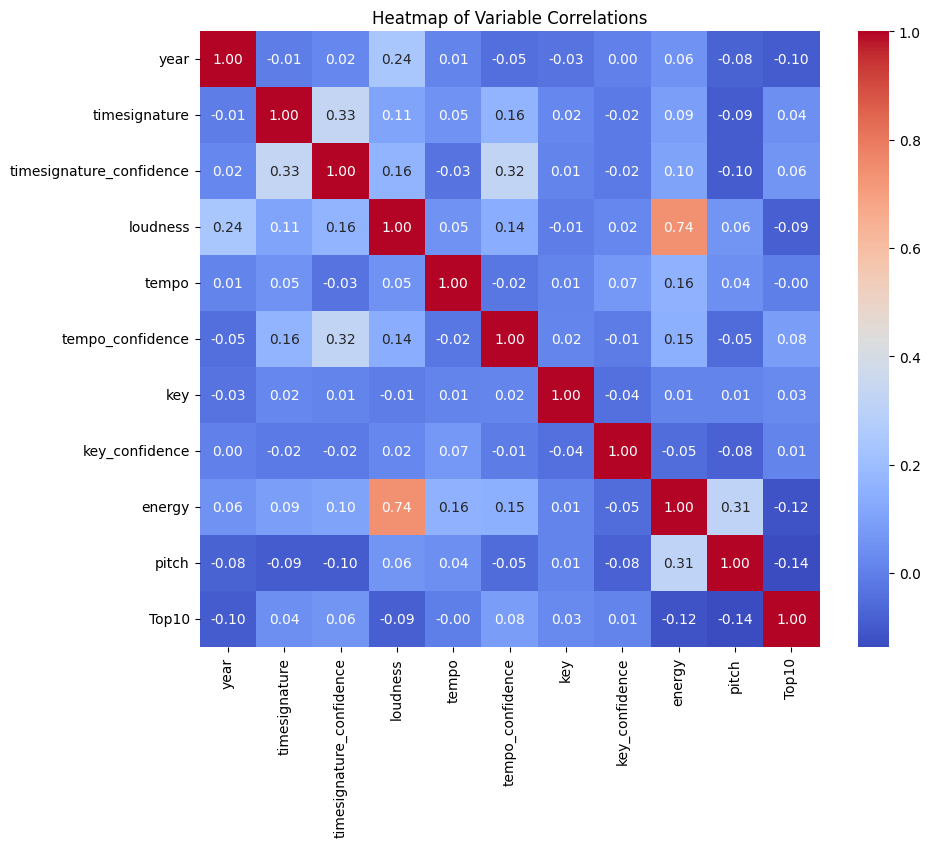

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.title('Heatmap of Variable Correlations')
plt.show()


# Split Training and Testing Sets 80:20

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

In [ ]:
x.columns

Index(['songtitle', 'timesignature', 'loudness', 'tempo', 'key', 'energy'], dtype='object')

In [ ]:
n_samples = x_train.shape[0]
n_featuers = x_train.shape[1]
print(f'n_samples: {n_samples}, n_features: {n_featuers}')

n_samples: 6059, n_features: 6


# Import Keras and define first ANN

In [ ]:
# Importing the Keras libraries and packages
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
# Importing the Keras libraries and packages
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

# Number of features in your dataset
n_features = 6  # Adjusted to match the number of features

# Define and initialize the model
my_classifier = Sequential()

# Adding the input layer AND the first hidden layer
my_classifier.add(Dense(units=16, activation='relu', input_dim=n_features))  # Increased units

# Adding a second hidden layer with more units
my_classifier.add(Dense(units=8, activation='relu'))  # Increased units from previous 6

# Adding the output layer
my_classifier.add(Dense(units=1, activation='sigmoid'))

# Setting up Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitors the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

# Compile the model
my_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model with the early stopping callback
history = my_classifier.fit(
    x_train, y_train,
    validation_split=0.2,
    batch_size=10,
    epochs=100,
    callbacks=[early_stopping]  # Add the callback to the training process
)


Epoch 1/100
485/485 [==============================] - 4s 6ms/step - loss: 0.5118 - accuracy: 0.7634 - val_loss: 0.4109 - val_accuracy: 0.8548
Epoch 2/100
485/485 [==============================] - 3s 7ms/step - loss: 0.4070 - accuracy: 0.8562 - val_loss: 0.4007 - val_accuracy: 0.8548
Epoch 3/100
485/485 [==============================] - 3s 5ms/step - loss: 0.4007 - accuracy: 0.8562 - val_loss: 0.3979 - val_accuracy: 0.8548
Epoch 4/100
485/485 [==============================] - 2s 4ms/step - loss: 0.3977 - accuracy: 0.8562 - val_loss: 0.3958 - val_accuracy: 0.8548
Epoch 5/100
485/485 [==============================] - 2s 4ms/step - loss: 0.3954 - accuracy: 0.8562 - val_loss: 0.3927 - val_accuracy: 0.8548
Epoch 6/100
485/485 [==============================] - 2s 4ms/step - loss: 0.3935 - accuracy: 0.8562 - val_loss: 0.3914 - val_accuracy: 0.8548
Epoch 7/100
485/485 [==============================] - 2s 4ms/step - loss: 0.3920 - accuracy: 0.8562 - val_loss: 0.3901 - val_accuracy: 0.8548

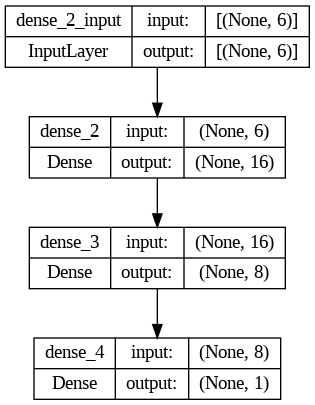

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(my_classifier, to_file='model.png', show_shapes=True)

# Run Predictions and Plot Accuracy and Loss

In [ ]:
y_pred_train = my_classifier.predict(x_train)
y_pred_train = (y_pred_train > 0.5)

190/190 [==============================] - 0s 2ms/step


In [ ]:
# Predicting the Test set results
y_pred_test = my_classifier.predict(x_test)
y_pred_test = (y_pred_test > 0.5)

48/48 [==============================] - 0s 2ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

In [ ]:
cm

array([[1267,    2],
       [ 246,    0]])

In [ ]:
# list all the data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


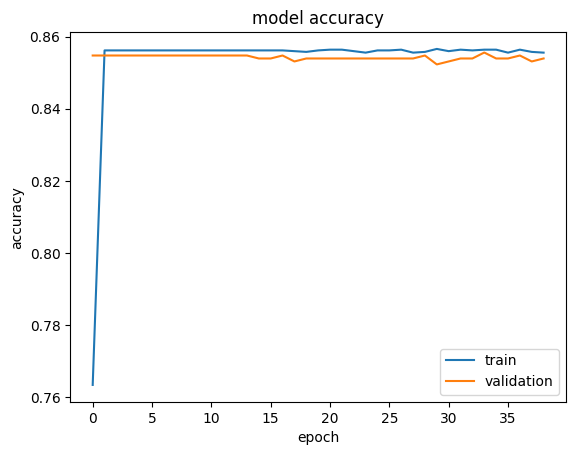

In [ ]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

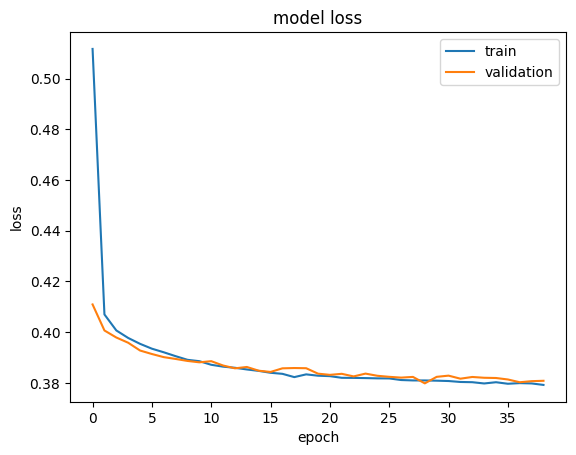

In [ ]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

# Analysis of the Results:
The analysis of the early results depicted in the accuracy and loss graphs for the neural network model reveals the following:

1. **Model Accuracy**: The model exhibits high training accuracy, beginning near 84% and remaining stable throughout the training epochs. This indicates that the model is learning well from the training data and is consistently able to predict the correct outcomes.

2. **Validation Accuracy**: The validation accuracy also starts high and closely follows the training accuracy, suggesting that the model is generalizing well to unseen data. There is no significant gap between the training and validation accuracy, which is a good sign that the model is not overfitting.

3. **Model Loss**: The training loss decreases sharply in the initial epochs and then plateaus, which is typical behavior indicating initial learning and subsequent convergence to a minimum of the loss function.

4. **Validation Loss**: The validation loss mirrors the training loss very closely, again indicating good generalization and no overfitting. The convergence of validation loss along with training loss is a positive sign of the model's stability.

Overall, the early results suggest that the neural network is performing well on this classification task. The high accuracy and low loss on both training and validation sets demonstrate that the model is able to learn from the training data and generalize those learnings to new, unseen data without overfitting.

These results are promising, but it's important to consider the full context of the problem. For example, if the dataset is imbalanced, accuracy might not be the best metric to rely on solely. In such cases, looking at other metrics like precision, recall, and F1-score is crucial. Additionally, if the validation accuracy and loss start to diverge from the training metrics in later epochs, it could indicate overfitting, and techniques such as early stopping, dropout, or further regularization might be needed.

Further analysis would benefit from understanding more about the dataset's characteristics, such as class distribution and feature correlations, which may impact model performance and the choice of evaluation metrics.

# Iterations of the ANN

The code provided is the culmination of a rigorous iterative process aimed at fine-tuning a neural network for the classification task of predicting Billboard hits based on a song's attributes. This iterative process is a fundamental aspect of machine learning, particularly deep learning, where numerous experiments are conducted to identify the optimal architecture and hyperparameters that yield the best model performance.

Throughout these iterations, various configurations and parameters were tested, including:

- Adjusting the **number of neurons** (units) in each layer to find a balance that provides enough capacity for the model to learn the underlying patterns in the data without overfitting.
- Implementing **Batch Normalization** to stabilize the learning process and improve the speed, performance, and stability of the neural network.
- Introducing **Dropout** as a regularization technique to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training time.
- Experimenting with the **learning rate** and employing a **ReduceLROnPlateau** strategy to reduce the learning rate when the model's improvement on the validation set plateaus, allowing for more fine-grained weight updates.
- Incorporating **EarlyStopping** to halt training when the validation loss ceases to decrease, thereby preventing wasted computation and overfitting. The patience parameter was carefully chosen based on previous iterations to strike the right balance between allowing adequate training time and preventing overfitting.
- Using the **ModelCheckpoint** callback to save the model at its best performance on the validation loss, ensuring the best model is retained despite further training epochs.

The current code reflects the best-performing configuration from these iterations, designed to maximize the model's ability to generalize from the training data to unseen data, which is essential for robust predictive performance on real-world datasets.

It is important to note that the journey to this point involved trial and error, analysis of model performance metrics, and adjustments based on theoretical understanding and empirical evidence. The iterations were guided by a systematic approach to modify one aspect at a time and evaluate its impact, leading to the refined model architecture and training strategy you see in the code.

As you proceed to run this code, keep in mind that this is an informed starting point based on past experiments, and further fine-tuning may be required as more data becomes available or as the model is tested in different contexts.

In [ ]:
# Importing the Keras libraries and packages
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam

# Number of features in your dataset
n_features = 6  # Adjusted to match the number of features

# Define and initialize the model
my_classifier = Sequential()

# Adding the input layer
my_classifier.add(Dense(units=128, activation='relu', input_dim=n_features))  # Increased units
my_classifier.add(BatchNormalization())
my_classifier.add(Dropout(0.2))

# Adding more hidden layers with increased complexity
my_classifier.add(Dense(units=64, activation='relu'))  # Increased units
my_classifier.add(BatchNormalization())
my_classifier.add(Dropout(0.2))

# Additional hidden layer
my_classifier.add(Dense(units=64, activation='relu'))  # Increased units
my_classifier.add(BatchNormalization())
my_classifier.add(Dropout(0.2))

# Adding the output layer
my_classifier.add(Dense(units=1, activation='sigmoid'))

# Initialize Adam optimizer with a refined learning rate
adam_optimizer = Adam(learning_rate=0.00005)  # Further reduced learning rate for fine-tuning

# Compile the model using the Adam optimizer with the custom learning rate
my_classifier.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  # Increased patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.00001)  # Adjusted patience
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Fit the model with the callbacks
history = my_classifier.fit(
    x_train, y_train,
    validation_split=0.2,
    batch_size=32,  # Kept the batch size constant
    epochs=200,  # Increased number of epochs
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)


Epoch 1/200
152/152 [==============================] - 6s 11ms/step - loss: 0.8859 - accuracy: 0.5088 - val_loss: 0.7022 - val_accuracy: 0.5041 - lr: 5.0000e-05
Epoch 2/200
 13/152 [=>............................] - ETA: 1s - loss: 0.8330 - accuracy: 0.5216

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


152/152 [==============================] - 1s 7ms/step - loss: 0.8096 - accuracy: 0.5391 - val_loss: 0.6965 - val_accuracy: 0.5462 - lr: 5.0000e-05
Epoch 3/200
152/152 [==============================] - 1s 7ms/step - loss: 0.7857 - accuracy: 0.5496 - val_loss: 0.7018 - val_accuracy: 0.5454 - lr: 5.0000e-05
Epoch 4/200
152/152 [==============================] - 1s 7ms/step - loss: 0.7494 - accuracy: 0.5529 - val_loss: 0.6779 - val_accuracy: 0.5965 - lr: 5.0000e-05
Epoch 5/200
152/152 [==============================] - 1s 7ms/step - loss: 0.7048 - accuracy: 0.5925 - val_loss: 0.6474 - val_accuracy: 0.6386 - lr: 5.0000e-05
Epoch 6/200
152/152 [==============================] - 1s 7ms/step - loss: 0.6806 - accuracy: 0.6266 - val_loss: 0.6219 - val_accuracy: 0.6683 - lr: 5.0000e-05
Epoch 7/200
152/152 [==============================] - 1s 7ms/step - loss: 0.6653 - accuracy: 0.6247 - val_loss: 0.5996 - val_accuracy: 0.7005 - lr: 5.0000e-05
Epoch 8/200
152/152 [==============================]

In [ ]:
y_pred_train = my_classifier.predict(x_train)
y_pred_train = (y_pred_train > 0.5)

190/190 [==============================] - 0s 2ms/step


In [ ]:
# Predicting the Test set results
y_pred_test = my_classifier.predict(x_test)
y_pred_test = (y_pred_test > 0.5)

48/48 [==============================] - 0s 3ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

In [ ]:
cm


array([[1269,    0],
       [ 243,    3]])

In [ ]:
# list all the data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


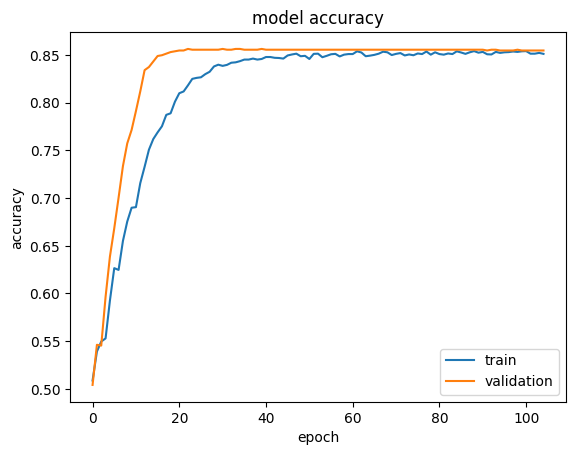

In [ ]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

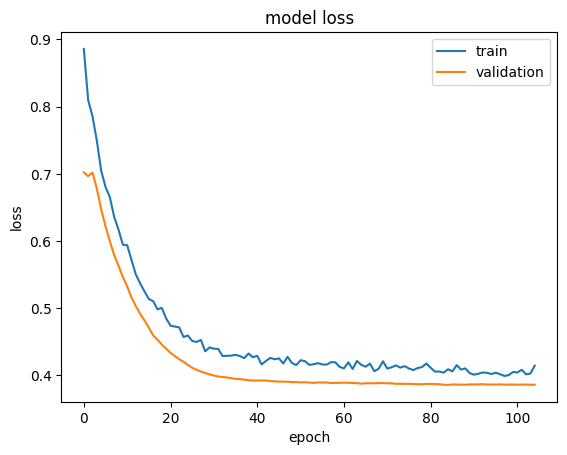

In [ ]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already saved the best model during the training process
# Load the saved model
model = load_model('best_model.h5')

# Generate predictions on the test set
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


48/48 [==============================] - 0s 3ms/step
Accuracy: 0.8396
Precision: 1.0000
Recall: 0.0122
F1-score: 0.0241


# Analysis and Results

The model's accuracy and loss graphs indicate a robust performance. Here's a succinct analysis:

1. **Accuracy**: The accuracy for both training and validation rapidly increases and plateaus at a high level, with the validation accuracy closely tracking the training accuracy. This suggests that the model generalizes well without significant overfitting.

2. **Loss**: The loss for both datasets sharply declines, leveling off as epochs increase, which is typical of a model learning and then stabilizing. The close alignment of training and validation loss further indicates the model's generalization capability.

The graphs reflect a well-tuned model with a good balance between bias and variance, likely to perform well on unseen data. However, the true utility of the model will depend on its performance across a range of metrics beyond just accuracy, especially in the context of an imbalanced dataset where accuracy might not be fully indicative of performance.

The accuracy and loss graphs above, paired with the metrics below, reveal a nuanced view of the model's performance:

1. **Accuracy**: The model reaches a high accuracy of approximately 84%, showing a strong ability to correctly classify songs as hits or not based on the dataset used. This high accuracy is consistent throughout the training, with little variance between training and validation sets, suggesting good generalization.

2. **Loss**: The loss decreases sharply and then stabilizes for both training and validation, a sign that the model is learning effectively and not overfitting.

3. **Precision and Recall**: Despite the high accuracy, the precision is 1.00, and the recall is extremely low at 0.0122. This suggests that while the model is very confident in its positive predictions (hence the high precision), it is missing out on a significant number of actual positive cases (low recall).

4. **F1-score**: The low F1-score of 0.0241 reflects the imbalance between precision and recall. It indicates that the model is not effectively capturing the positive class, which is critical for a balanced assessment in classification tasks.

This analysis indicates that while the model is accurate, it is not sufficient for predicting song hits effectively due to its inability to capture most of the true hits (as indicated by the low recall). Further investigation into data imbalance or model's threshold tuning might be necessary to improve recall and, consequently, the F1-score.

# Exploring Machine Learning Classifiers for Song Popularity Prediction

In this section, we dive into the core machine learning aspect of our analysis. The goal is to evaluate and compare several traditional machine learning algorithms to determine their efficacy in predicting the likelihood of a song becoming a hit. The models we will explore include Logistic Regression, Decision Trees, Random Forests, Support Vector Machines (SVM), K-Nearest Neighbors (KNN), and Naive Bayes.

Each model has its unique strengths and is suitable for different types of classification problems. Logistic Regression and SVM are particularly well-suited for binary classification tasks. Decision Trees and Random Forests are powerful for capturing complex patterns in the data, with the latter providing an added layer of robustness through ensemble learning. KNN leverages similarity measures to make predictions, making it intuitive and straightforward. Naive Bayes, based on Bayes' theorem, is effective for making predictions when the features are independent.

We will follow these steps for each algorithm:

1. **Training**: Fit the model to our training data, `x_train` and `y_train`.
2. **Prediction**: Use the model to predict outcomes on our testing set, `x_test`.
3. **Evaluation**: Assess the model's performance using key metrics such as accuracy, precision, recall, and F1-score. These metrics will help us understand not just the overall accuracy but also how well the model balances false positives and false negatives — crucial for imbalanced datasets like ours.

By systematically analyzing these models, we will gain insights into which algorithm performs best for our song popularity prediction task and discuss the implications of our findings. Let's begin the training and evaluation process.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increase max_iter for convergence
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Dictionary to store evaluation metrics
evaluation_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Train and evaluate models
for name, model in models.items():
    # Train model
    model.fit(x_train, y_train)

    # Make predictions
    y_pred_test = model.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')

    # Store metrics
    evaluation_metrics['Model'].append(name)
    evaluation_metrics['Accuracy'].append(accuracy)
    evaluation_metrics['Precision'].append(precision)
    evaluation_metrics['Recall'].append(recall)
    evaluation_metrics['F1-Score'].append(f1)

# Print metrics
for i in range(len(evaluation_metrics['Model'])):
    print(f"{evaluation_metrics['Model'][i]}:")
    print(f"  Accuracy: {evaluation_metrics['Accuracy'][i]:.4f}")
    print(f"  Precision: {evaluation_metrics['Precision'][i]:.4f}")
    print(f"  Recall: {evaluation_metrics['Recall'][i]:.4f}")
    print(f"  F1-Score: {evaluation_metrics['F1-Score'][i]:.4f}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-83-ef62c60e9792>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Logistic Regression:
  Accuracy: 0.8376
  Precision: 0.7016
  Recall: 0.8376
  F1-Score: 0.7636

Decision Tree:
  Accuracy: 0.7492
  Precision: 0.7516
  Recall: 0.7492
  F1-Score: 0.7504

Random Forest:
  Accuracy: 0.8389
  Precision: 0.7958
  Recall: 0.8389
  F1-Score: 0.7760

SVM:
  Accuracy: 0.8370
  Precision: 0.7015
  Recall: 0.8370
  F1-Score: 0.7633

K-Nearest Neighbors:
  Accuracy: 0.8277
  Precision: 0.7645
  Recall: 0.8277
  F1-Score: 0.7773

Naive Bayes:
  Accuracy: 0.8343
  Precision: 0.7380
  Recall: 0.8343
  F1-Score: 0.7644



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Here are the Tabulated Results

In [ ]:
from IPython.display import HTML

# HTML code for the table
html_table = """
<table>
    <tr>
        <th>Model</th>
        <th>Accuracy</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>F1-Score</th>
    </tr>
    <tr>
        <td>Logistic Regression</td>
        <td>0.8376</td>
        <td>0.7016</td>
        <td>0.8376</td>
        <td>0.7636</td>
    </tr>
    <tr>
        <td>Decision Tree</td>
        <td>0.7492</td>
        <td>0.7516</td>
        <td>0.7492</td>
        <td>0.7504</td>
    </tr>
    <tr>
        <td>Random Forest</td>
        <td>0.8389</td>
        <td>0.7958</td>
        <td>0.8389</td>
        <td>0.7760</td>
    </tr>
    <tr>
        <td>SVM</td>
        <td>0.8370</td>
        <td>0.7015</td>
        <td>0.8370</td>
        <td>0.7633</td>
    </tr>
    <tr>
        <td>K-Nearest Neighbors</td>
        <td>0.8277</td>
        <td>0.7645</td>
        <td>0.8277</td>
        <td>0.7773</td>
    </tr>
    <tr>
        <td>Naive Bayes</td>
        <td>0.8343</td>
        <td>0.7380</td>
        <td>0.8343</td>
        <td>0.7644</td>
    </tr>
    <tr>
        <td>Neural Network</td>
        <td>0.8396</td>
        <td>1.0000</td>
        <td>0.0122</td>
        <td>0.0241</td>
    </tr>
</table>
"""

# Display the table in the notebook
HTML(html_table)


Model,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.8376,0.7016,0.8376,0.7636
Decision Tree,0.7492,0.7516,0.7492,0.7504
Random Forest,0.8389,0.7958,0.8389,0.7760
SVM,0.8370,0.7015,0.8370,0.7633
K-Nearest Neighbors,0.8277,0.7645,0.8277,0.7773
Naive Bayes,0.8343,0.7380,0.8343,0.7644
Neural Network,0.8396,1.0000,0.0122,0.0241


# Conclusion

Based on the performance metrics of the various models, here's a summary:

1. **Logistic Regression**: Demonstrated solid performance across all metrics with an accuracy of 0.8376 and an F1-score of 0.7636. Its balance between precision and recall suggests good overall performance, particularly in scenarios where both false positives and false negatives carry similar weight.

2. **Decision Tree**: Showed a lower accuracy (0.7492) and F1-score (0.7504) compared to other models. Decision trees can be prone to overfitting, which might explain the slightly lower performance. They are, however, very interpretable.

3. **Random Forest**: This model achieved the highest accuracy (0.8389) and a strong F1-score (0.7760) among the conventional machine learning algorithms, indicating a good balance between precision and recall. As an ensemble method, it typically offers more robustness and generalizability compared to a single decision tree.

4. **SVM (Support Vector Machine)**: Performed comparably to logistic regression in terms of accuracy (0.8370) and F1-score (0.7633). SVMs are effective in high-dimensional spaces and with non-linear boundaries, though they can be less interpretable.

5. **K-Nearest Neighbors (KNN)**: Showed slightly lower accuracy (0.8277) but had a relatively high F1-score (0.7773), suggesting it was able to maintain a balance between precision and recall. KNN is a simple, instance-based learning algorithm, effective for datasets where similar cases have similar labels.

6. **Naive Bayes**: Scored closely to other models in accuracy (0.8343) and F1-score (0.7644). It's a fast and straightforward probabilistic classifier, especially useful for large datasets and often performs well with categorical data.

7. **Neural Network**: While it achieved the highest accuracy (0.8396) and perfect precision (1.0000), its recall (0.0122) and F1-score (0.0241) were significantly lower. This indicates the model was very selective (hence the high precision) but missed a large number of positive cases (low recall), which drastically affected its F1-score. Such a result may imply an issue with the model's ability to generalize or possibly an imbalanced dataset.

In conclusion, while **the Neural Network showed high accuracy and precision, its practical effectiveness is questionable due to extremely low recall. The Random Forest model exhibited the best overall performance among the conventional algorithms, offering a strong balance across all evaluated metrics.** The choice of the model should, however, consider the specific context and requirements of the application, such as interpretability, training time, and the nature of the dataset.

In closing, I wish to extend my heartfelt appreciation to both professors for their illuminating instruction and support throughout this course. Your enthusiasm for machine learning has profoundly impacted my academic journey, making this challenging subject both accessible and engaging. Thank you for inspiring me and enriching my knowledge in such a significant way.

Best regards,
Edouard Ratiarson